Import Dataset dan Library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("heart_clean..csv")

print("Shape dataset:", df.shape)
df.head()


Shape dataset: (918, 20)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.779375,-0.166285,0.104640,-0.542709,0.229991,-0.836286,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Membangun Baseline Model

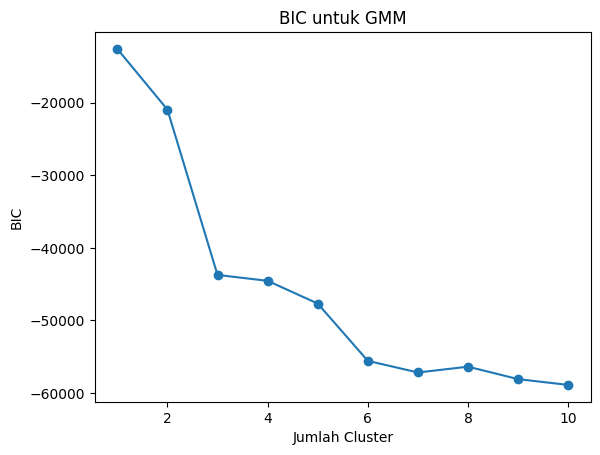

,Prob_Cluster_0,Prob_Cluster_1
0,1.162486e-32,1.000000
1,1.091014e-10,1.000000
2,4.358690e-34,1.000000
3,9.996448e-01,0.000355
4,1.517470e-12,1.000000


In [9]:
bic_scores = []
n_components_range = range(1, 11)

for n in n_components_range:
    gmm = GaussianMixture(
        n_components=n,
        random_state=42,
        covariance_type='full'
    )
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("BIC")
plt.title("BIC untuk GMM")
plt.show()

gmm_baseline = GaussianMixture(
    n_components=2,
    random_state=42,
    covariance_type='full'
)

labels = gmm_baseline.fit_predict(X)

df_clustered = X.copy()
df_clustered["Cluster"] = labels

df_clustered["Cluster"].value_counts()

proba = gmm_baseline.predict_proba(X)

proba_df = pd.DataFrame(
    proba,
    columns=[f"Prob_Cluster_{i}" for i in range(proba.shape[1])]
)

proba_df.head()


Model Final

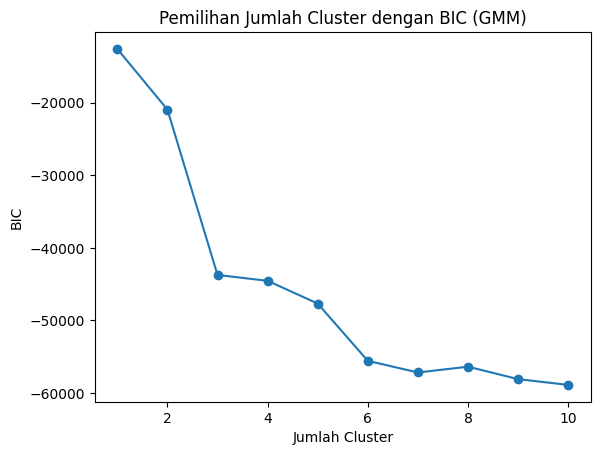

Cluster = 2, Silhouette Score = 0.152
Cluster = 3, Silhouette Score = 0.145
Cluster = 4, Silhouette Score = 0.134
Cluster = 5, Silhouette Score = 0.142
Cluster = 6, Silhouette Score = 0.120
Cluster = 7, Silhouette Score = 0.119


,Prob_Cluster_0,Prob_Cluster_1
0,1.162486e-32,1.000000
1,1.091014e-10,1.000000
2,4.358690e-34,1.000000
3,9.996448e-01,0.000355
4,1.517470e-12,1.000000


In [11]:
bic_scores = []
n_components_range = range(1, 11)

for n in n_components_range:
    gmm = GaussianMixture(
        n_components=n,
        random_state=42,
        covariance_type='full'
    )
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

plt.figure()
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("BIC")
plt.title("Pemilihan Jumlah Cluster dengan BIC (GMM)")
plt.show()

for n in range(2, 8):
    gmm = GaussianMixture(
        n_components=n,
        random_state=42,
        covariance_type='full'
    )
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Cluster = {n}, Silhouette Score = {score:.3f}")

gmm_final = GaussianMixture(
    n_components=2,
    random_state=42,
    covariance_type='full'
)

labels = gmm_final.fit_predict(X)

df_clustered = X.copy()
df_clustered["Cluster"] = labels

df_clustered["Cluster"].value_counts()

proba = gmm_final.predict_proba(X)

proba_df = pd.DataFrame(
    proba,
    columns=[f"Prob_Cluster_{i}" for i in range(proba.shape[1])]
)

proba_df.head()
